
___
# East African Countries Economic Growth Analysis

---
#### Table of Contents

1. [Dataset Details](#dataset-details)
2. [Importing Libraries and Dataset](#importing-libraries-and-dataset)
3. [First Look at the Dataset](#first-look-at-the-dataset)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Data Preprocessing](#data-preprocessing)
 

## 1. Dataset Details <a name="dataset-details"></a>
The Dataset is taken from the [World Development Indicators](https://datacatalog.worldbank.org/dataset/world-development-indicators) and [ILOSTAT](https://www.ilo.org/ilostat/faces/home/statisticaldata) databases. It contains the data of East African countries for 31 years from 1991 to 2021.

The dataset contains 186 observations on 6 countries. The variables included in the dataset are:

- `Country`: Country Name
- `Year`: Year of observation
- `GDP growth (annual %)`: Annual percentage growth rate of GDP at market prices based on constant local currency.
- `Labor force`: Total persons available for work; includes both the employed and the unemployed.
- `Gross capital formation (% of GDP)`: Total amount of capital used for the production of goods and services, measured as a share of GDP.
- `Trade (% of GDP)`: Trade is the sum of exports and imports of goods and services measured as a share of gross domestic product.
- `Broad money (% of GDP)`: Broad money is the sum of currency held by nonbanking public and demand deposits at deposit money banks.
- `Political stability`: 
- `Agriculture (% of GDP)`: Agriculture corresponds to ISIC divisions 1-5 and includes forestry, hunting, and fishing, as well as cultivation of crops and livestock production. Value added is the net output of a sector after adding up all outputs and subtracting intermediate inputs. It is calculated without making deductions for depreciation of fabricated assets or depletion and degradation of natural resources.
- `Industry (% of GDP)`: Industry corresponds to ISIC divisions 10-45 and includes manufacturing (ISIC divisions 15-37). It comprises value added in mining, manufacturing (also reported as a separate subgroup), construction, electricity, water, and gas.
- `Manufacturing (% of GDP)`: Manufacturing refers to industries belonging to ISIC divisions 15-37. 
- `Services (% of GDP)`: Services correspond to ISIC divisions 50-99 and they include value added in wholesale and retail trade (including hotels and restaurants), transport, and government, financial, professional, and personal services such as education, health care, and real estate services. Also included are imputed bank service charges, import duties, and any statistical discrepancies noted by national compilers as well as discrepancies arising from rescaling.
- `Agriculture (% of employment)`: Agriculture (% of employment) is the percentage of the labor force that is engaged in agriculture.
- `Industry (% of employment)`: Industry (% of employment) is the percentage of the labor force that is engaged in industry.
- `Manufacturing (% of employment)`: Manufacturing (% of employment) is the percentage of the labor force that is engaged in manufacturing.
- `Services (% of employment)`: Services (% of employment) is the percentage of the labor force that is engaged in service.

## 2. Importing Libraries and Dataset <a name="importing-libraries-and-dataset"></a>



In [74]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import scipy.stats as stats
from src.eda import *
from linearmodels import PanelOLS, RandomEffects, PooledOLS
from linearmodels.panel import compare
import linearmodels.panel
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Display the correlation
print(plt.style.available)
# Print available palettes in sns

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [76]:
# Importing Dataset
df = pd.read_csv('../data/processed/sectoral_data.csv')

In [77]:
# Drop 'Industry (% of GDP)' and 'Industry (% of employment)'
df.drop(columns=['Industry (% of GDP)', 'Industry (% of employment)'], inplace=True)

## 3. First Look at the Dataset <a name="first-look-at-the-dataset"></a>

We will first look at the dataset to get a better understanding of the data.

In [78]:
# Displaying information about the dataset
show_df(df.set_index(['Country', 'Year']), head=True, describe=True)
# display(df.describe().T)
# show_df(df, head=False, describe=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 186 entries, ('Burundi', 1991) to ('Uganda', 2021)
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GDP growth (annual %)               186 non-null    float64
 1   Labor force                         186 non-null    float64
 2   Gross capital formation (% of GDP)  184 non-null    float64
 3   Manufacturing (% of GDP)            177 non-null    float64
 4   Manufacturing (% of employment)     186 non-null    float64
 5   Services (% of GDP)                 168 non-null    float64
 6   Services (% of employment)          186 non-null    float64
 7   Agriculture (% of GDP)              183 non-null    float64
 8   Agriculture (% of employment)       186 non-null    float64
 9   Trade (% of GDP)                    183 non-null    float64
 10  Broad money (% of GDP)              177 non-null    float64
 11  Political stabil

GDP growth (annual %)  Labor force   
Country Year                                       
Burundi 1991               4.996836    2568641.0  \
        1992               1.009998    2622016.0   
        1993              -6.240000    2410298.0   
        1994              -3.830000    2394789.0   
        1995              -7.920000    2628505.0   

              Gross capital formation (% of GDP)  Manufacturing (% of GDP)   
Country Year                                                                 
Burundi 1991                           14.409763                 12.707954  \
        1992                           10.638298                  8.599291   
        1993                           11.540149                  8.424748   
        1994                            6.974127                  9.351748   
        1995                            6.363436                  8.258460   

              Manufacturing (% of employment)  Services (% of GDP)   
Country Year                                                         
Burundi 1991                         1.721456            23.348498  \
        1992                         1.704705            22.681460   
        1993                         1.689116            22.351357   
        1994                         1.676124            26.770380   
        1995                         1.654386            28.460970   

              Services (% of employment)  Agriculture (% of GDP)   
Country Year                                                       
Burundi 1991                    6.211410               48.597910  \
        1992                    6.212398               48.004522   
        1993                    6.015683               47.169812   
        1994                    5.898704               40.732325   
        1995                    5.612448               42.022693   

              Agriculture (% of employment)  Trade (% of GDP)   
Country Year                                                    
Burundi 1991                      91.372891         38.422560  \
        1992                      91.397700         38.226131   
        1993                      91.626692         36.542997   
        1994                      91.773723         38.753524   
        1995                      92.105856         40.204626   

              Broad money (% of GDP)  Political stability  
Country Year                                               
Burundi 1991               17.035602                  NaN  
        1992               16.907536                  NaN  
        1993               17.733129                  NaN  
        1994               23.005207                  NaN  
        1995               19.803614                  NaN

,Observations,Mean,Standard deviation,Minimum,25th percentile,Median,75th percentile,Maximum
Variable,,,,,,,,
GDP growth (annual %),186.0,3.96,6.33,-50.25,2.23,4.88,6.76,35.22
Labor force,186.0,12652572.95,8451936.26,1698315.00,4123102.25,12128621.00,19073917.75,33725417.00
Gross capital formation (% of GDP),184.0,19.03,7.93,0.00,14.35,18.88,23.92,39.73
Manufacturing (% of GDP),177.0,10.62,3.85,0.00,8.14,9.44,11.86,21.22
Manufacturing (% of employment),186.0,4.32,2.84,1.25,1.72,3.46,6.18,11.40
Services (% of GDP),168.0,41.48,7.87,22.35,35.12,42.69,47.65,58.41
Services (% of employment),186.0,22.43,12.59,5.20,12.04,20.74,27.59,51.41
Agriculture (% of GDP),183.0,30.27,9.43,16.25,23.84,26.59,36.06,56.54
Agriculture (% of employment),186.0,70.27,16.33,33.03,62.93,71.35,84.63,92.59


## 4. Exploratory Data Analysis <a name="exploratory-data-analysis"></a>

In [79]:
# Checking for missing and duplicate values in the dataset
display(df.isna().sum())

Country                                0
Year                                   0
GDP growth (annual %)                  0
Labor force                            0
Gross capital formation (% of GDP)     2
Manufacturing (% of GDP)               9
Manufacturing (% of employment)        0
Services (% of GDP)                   18
Services (% of employment)             0
Agriculture (% of GDP)                 3
Agriculture (% of employment)          0
Trade (% of GDP)                       3
Broad money (% of GDP)                 9
Political stability                   48
dtype: int64

These are missing at random and are eligible for imputation given the size of the dataset.

In [80]:
clean_df = df.copy()

clean_df['Country ID'] = clean_df['Country'].astype('category').cat.codes + 1

# Imputing missing values
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)

# Impute but temporarily drop 'Country' first
clean_df[clean_df.columns[1:]] = imputer.fit_transform(clean_df[clean_df.columns[1:]].values)

# Reindex 'Country ID' as the first column.
clean_df = clean_df.reindex(columns=['Country ID'] + list(clean_df.columns[:-1]))

# Validate dtypes
clean_df = clean_df.astype({'Country ID': 'int',
                            'Year': 'int',
                            'Country': 'category'})

show_df(clean_df)

# Validate imputation
clean_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Country ID                          186 non-null    int32   
 1   Country                             186 non-null    category
 2   Year                                186 non-null    int32   
 3   GDP growth (annual %)               186 non-null    float64 
 4   Labor force                         186 non-null    float64 
 5   Gross capital formation (% of GDP)  186 non-null    float64 
 6   Manufacturing (% of GDP)            186 non-null    float64 
 7   Manufacturing (% of employment)     186 non-null    float64 
 8   Services (% of GDP)                 186 non-null    float64 
 9   Services (% of employment)          186 non-null    float64 
 10  Agriculture (% of GDP)              186 non-null    float64 
 11  Agriculture (% of employment)   

,Country ID,Country,Year,GDP growth (annual %),Labor force,Gross capital formation (% of GDP),Manufacturing (% of GDP),Manufacturing (% of employment),Services (% of GDP),Services (% of employment),Agriculture (% of GDP),Agriculture (% of employment),Trade (% of GDP),Broad money (% of GDP),Political stability
0,1,Burundi,1991,4.996836,2568641.0,14.409763,12.707954,1.721456,23.348498,6.211410,48.597910,91.372891,38.422560,17.035602,-2.081101
1,1,Burundi,1992,1.009998,2622016.0,10.638298,8.599291,1.704705,22.681460,6.212398,48.004522,91.397700,38.226131,16.907536,-2.240303
2,1,Burundi,1993,-6.240000,2410298.0,11.540149,8.424748,1.689116,22.351357,6.015683,47.169812,91.626692,36.542997,17.733129,-2.247147
3,1,Burundi,1994,-3.830000,2394789.0,6.974127,9.351748,1.676124,26.770380,5.898704,40.732325,91.773723,38.753524,23.005207,-2.342528
4,1,Burundi,1995,-7.920000,2628505.0,6.363436,8.258460,1.654386,28.460970,5.612448,42.022693,92.105856,40.204626,19.803614,-2.374995


Country ID                            0
Country                               0
Year                                  0
GDP growth (annual %)                 0
Labor force                           0
Gross capital formation (% of GDP)    0
Manufacturing (% of GDP)              0
Manufacturing (% of employment)       0
Services (% of GDP)                   0
Services (% of employment)            0
Agriculture (% of GDP)                0
Agriculture (% of employment)         0
Trade (% of GDP)                      0
Broad money (% of GDP)                0
Political stability                   0
dtype: int64

In [81]:
# Check whether the data is balanced
clean_df['Country'].value_counts()

Country
Burundi             31
Congo, Dem. Rep.    31
Kenya               31
Rwanda              31
Tanzania            31
Uganda              31
Name: count, dtype: int64

In [82]:
gdpg, empl, pgdp = True, False, False

clean_df['GDP growth (annual %)'] = stats.mstats.winsorize(clean_df['GDP growth (annual %)'], limits=[0.0275, 0.0275])

if gdpg:
    const = abs(clean_df['GDP growth (annual %)'].min()) + 1
    clean_df['GDP growth (annual %)'], _ = stats.boxcox(clean_df['GDP growth (annual %)'] + const)
    clean_df.rename(columns={'GDP growth (annual %)': f'GDP growth (annual %) (BC_{_.round(1)})'}, inplace=True)
    
    print("Lambda: ", _)
    # clean_df['GDP growth (annual %)'] = np.log(clean_df['GDP growth (annual %)'] + const)

# Replace outliers in 'GDP growth (annual %)' with the mean
# Get outliers (Top 1% and bottom 1%)
# outliers = clean_df['GDP growth (annual %)'].quantile([0.05, 0.99]).values
# condition = (clean_df['GDP growth (annual %)'] < outliers[0]) | (clean_df['GDP growth (annual %)'] > outliers[1])
# clean_df.loc[condition, 'GDP growth (annual %)'] = clean_df['GDP growth (annual %)'].median()


cols = ['Labor force']

if empl:
    cols += ['Manufacturing (% of employment)', 'Services (% of employment)', 'Agriculture (% of employment)']
    
if pgdp:
    cols += ['Manufacturing (% of GDP)', 'Services (% of GDP)', 'Agriculture (% of GDP)']

transform_x = True 

# cols = clean_df.columns[4:-1]
  
if transform_x:
    for col in cols:
        if clean_df[col].min() <= 0:
            clean_df[col] = clean_df[col] + abs(clean_df[col].min()) + 1
        clean_df[col], __ = stats.boxcox(clean_df[col])
        # clean_df[col] = np.log(clean_df[col])
        clean_df.rename(columns={col: f'{col} (BC_{__.round(1)})'}, inplace=True)
        print(col, __)
        
# If a column has been transformed, add a prefix BC( and suffix )_{lambda}
# for col in cols:
#     if col in clean_df.columns:
#         clean_df.rename(columns={col: f'BC({col})_{__}'}, inplace=True)
        
# for col in clean_df.columns[4:]:
#     clean_df[col] = stats.mstats.winsorize(clean_df[col], limits=[0.05, 0.05])
yname = clean_df.columns[3]
# # Standard scaler
# for col in clean_df.columns[3:]:
#     # clean_df[col] = stats.mstats.winsorize(clean_df[col], limits=[0.0125, 0.01])
#     clean_df[col] = (clean_df[col] - clean_df[col].mean()) / clean_df[col].std()

Lambda:  1.615075235714825
Labor force 0.32939225319627424


In [83]:
show_df(clean_df.set_index(['Country ID', 'Country', 'Year']),
        describe=True,
        save=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 186 entries, (1, 'Burundi', 1991) to (6, 'Uganda', 2021)
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GDP growth (annual %) (BC_1.6)      186 non-null    float64
 1   Labor force (BC_0.3)                186 non-null    float64
 2   Gross capital formation (% of GDP)  186 non-null    float64
 3   Manufacturing (% of GDP)            186 non-null    float64
 4   Manufacturing (% of employment)     186 non-null    float64
 5   Services (% of GDP)                 186 non-null    float64
 6   Services (% of employment)          186 non-null    float64
 7   Agriculture (% of GDP)              186 non-null    float64
 8   Agriculture (% of employment)       186 non-null    float64
 9   Trade (% of GDP)                    186 non-null    float64
 10  Broad money (% of GDP)              186 non-null    float64
 11  Political 

GDP growth (annual %) (BC_1.6)  Labor force (BC_0.3)   
Country ID Country Year                                                         
1          Burundi 1991                       43.307853            389.241487  \
                   1992                       24.942163            391.907974   
                   1993                        2.571700            381.105652   
                   1994                        8.174058            380.289714   
                   1995                        0.081949            392.229659   

                         Gross capital formation (% of GDP)   
Country ID Country Year                                       
1          Burundi 1991                           14.409763  \
                   1992                           10.638298   
                   1993                           11.540149   
                   1994                            6.974127   
                   1995                            6.363436   

                         Manufacturing (% of GDP)   
Country ID Country Year                             
1          Burundi 1991                 12.707954  \
                   1992                  8.599291   
                   1993                  8.424748   
                   1994                  9.351748   
                   1995                  8.258460   

                         Manufacturing (% of employment)  Services (% of GDP)   
Country ID Country Year                                                         
1          Burundi 1991                         1.721456            23.348498  \
                   1992                         1.704705            22.681460   
                   1993                         1.689116            22.351357   
                   1994                         1.676124            26.770380   
                   1995                         1.654386            28.460970   

                         Services (% of employment)  Agriculture (% of GDP)   
Country ID Country Year                                                       
1          Burundi 1991                    6.211410               48.597910  \
                   1992                    6.212398               48.004522   
                   1993                    6.015683               47.169812   
                   1994                    5.898704               40.732325   
                   1995                    5.612448               42.022693   

                         Agriculture (% of employment)  Trade (% of GDP)   
Country ID Country Year                                                    
1          Burundi 1991                      91.372891         38.422560  \
                   1992                      91.397700         38.226131   
                   1993                      91.626692         36.542997   
                   1994                      91.773723         38.753524   
                   1995                      92.105856         40.204626   

                         Broad money (% of GDP)  Political stability  
Country ID Country Year                                               
1          Burundi 1991               17.035602            -2.081101  
                   1992               16.907536            -2.240303  
                   1993               17.733129            -2.247147  
                   1994               23.005207            -2.342528  
                   1995               19.803614            -2.374995

,Observations,Mean,Standard deviation,Minimum,25th percentile,Median,75th percentile,Maximum
Variable,,,,,,,,
GDP growth (annual %) (BC_1.6),186.0,40.92,18.28,0.00,30.15,42.74,52.59,78.58
Labor force (BC_0.3),186.0,621.38,160.60,339.26,455.41,651.06,756.25,913.05
Gross capital formation (% of GDP),186.0,18.93,7.94,0.00,14.23,18.71,23.85,39.73
Manufacturing (% of GDP),186.0,10.57,3.76,0.00,8.26,9.45,11.53,21.22
Manufacturing (% of employment),186.0,4.32,2.84,1.25,1.72,3.46,6.18,11.40
Services (% of GDP),186.0,41.97,7.70,22.35,35.51,43.45,47.75,58.41
Services (% of employment),186.0,22.43,12.59,5.20,12.04,20.74,27.59,51.41
Agriculture (% of GDP),186.0,30.41,9.41,16.25,23.85,26.70,36.72,56.54
Agriculture (% of employment),186.0,70.27,16.33,33.03,62.93,71.35,84.63,92.59


,GDP growth (annual %) (BC_1.6),Political stability,Gross capital formation (% of GDP),Services (% of GDP),Services (% of employment),Trade (% of GDP),Manufacturing (% of employment),Manufacturing (% of GDP),Labor force (BC_0.3),Agriculture (% of employment),Broad money (% of GDP),Agriculture (% of GDP)
GDP growth (annual %) (BC_1.6),1.00,0.44,0.38,0.24,0.08,0.08,0.03,0.03,0.02,-0.07,-0.16,-0.34
Political stability,0.44,1.00,0.71,0.51,0.21,-0.06,0.02,-0.24,0.03,-0.21,0.22,-0.42
Gross capital formation (% of GDP),0.38,0.71,1.00,0.24,0.36,0.24,0.13,0.03,0.46,-0.34,0.12,-0.52
Services (% of GDP),0.24,0.51,0.24,1.00,0.53,-0.06,0.35,-0.08,0.09,-0.53,0.51,-0.69
Services (% of employment),0.08,0.21,0.36,0.53,1.00,0.43,0.84,0.11,0.63,-0.99,0.53,-0.64
Trade (% of GDP),0.08,-0.06,0.24,-0.06,0.43,1.00,0.42,0.30,0.43,-0.44,0.08,-0.32
Manufacturing (% of employment),0.03,0.02,0.13,0.35,0.84,0.42,1.00,0.11,0.40,-0.85,0.43,-0.40
Manufacturing (% of GDP),0.03,-0.24,0.03,-0.08,0.11,0.30,0.11,1.00,0.30,-0.10,-0.24,-0.32
Labor force (BC_0.3),0.02,0.03,0.46,0.09,0.63,0.43,0.40,0.30,1.00,-0.60,0.02,-0.51
Agriculture (% of employment),-0.07,-0.21,-0.34,-0.53,-0.99,-0.44,-0.85,-0.10,-0.60,1.00,-0.50,0.62


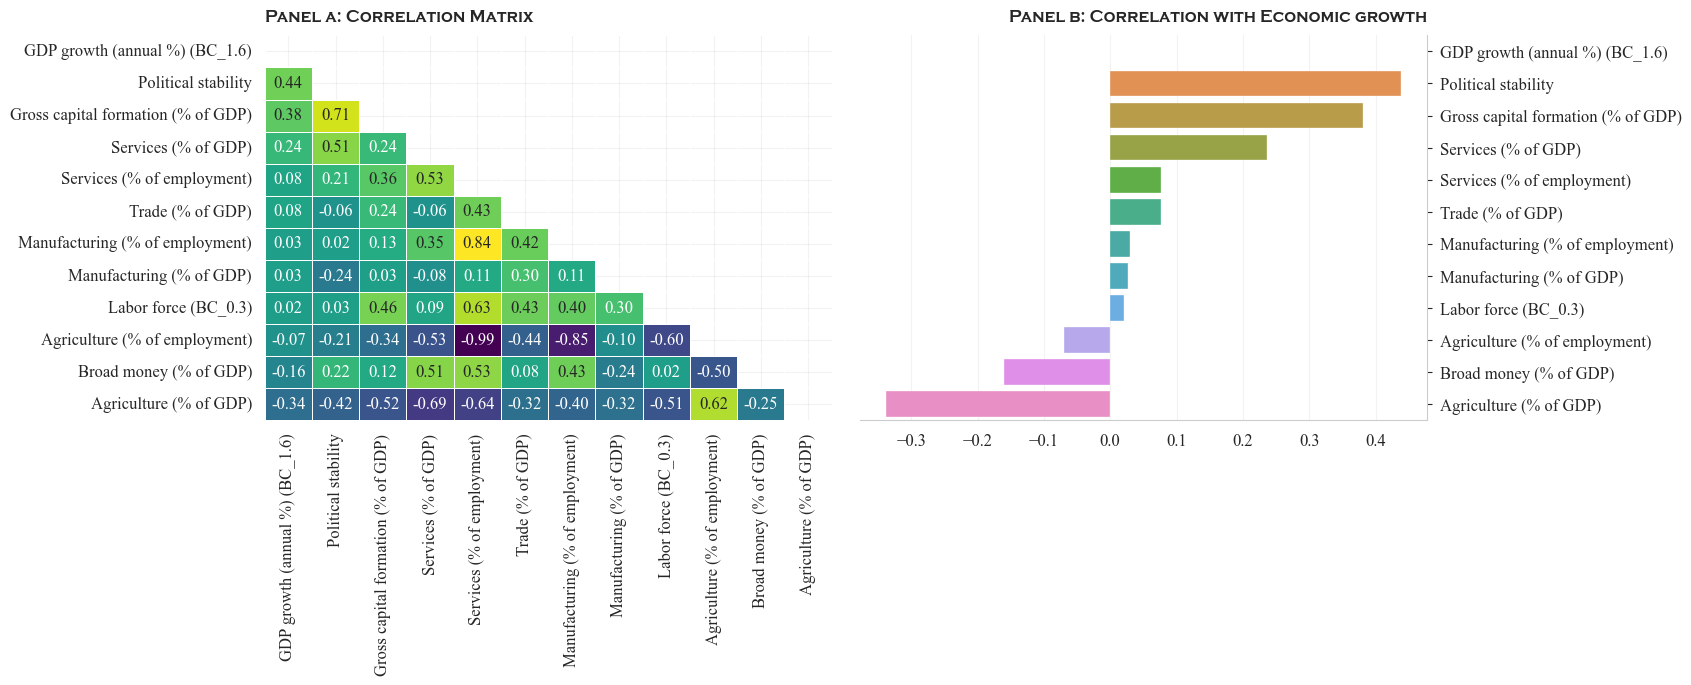

In [84]:
plt.style.use('seaborn-v0_8-paper')
plt.rcParams['font.family'] = 'Times New Roman'
# sns.set_palette('viridis')
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['grid.alpha'] = 0.25


# Axes settings





# Compute the correlation matrix
corr = clean_df.set_index(['Country ID', 'Country', 'Year']).corr()

corr = corr.sort_values(by=yname, axis=1, ascending=False).sort_values(by=yname, axis=0, ascending=False)

display(corr.round(2))

corr = corr.replace(1, 0)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set viridis inverted as the colormap
cmap = sns.color_palette('viridis', as_cmap=True)

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# 
# # Plot correlation matrix and correlation coefficients with Economic Growth
# sns.heatmap(corr, annot=True, cmap=cmap, ax=ax1)
# 
# # Plot correlation coefficients with Economic Growth
# sns.barplot(x=corr['GDP growth (annual %)'].sort_values(ascending=False).values,
#             y=corr['GDP growth (annual %)'].sort_values(ascending=False).index,
#             ax=ax2)

# Set up the matplotlib figure (right spine should be active)
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'wspace': 0.05})

# Draw the heatmap with the mask and correct aspect ratio ('Viridis' colormap)
sns.heatmap(corr, mask=mask, cbar=False, cmap=cmap,
            ax=ax[0], annot=True, fmt='.2f', linewidths=.5)


# sns.heatmap(corr, cmap=cmap, cbar_kws={"shrink": .5},
#             ax=ax[0], annot=True, fmt='.2f',
#             square=True, linewidths=.5)
ax[0].set_title('Panel a: Correlation Matrix', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
# ax[0].tick_params(axis='y', which='both', length=0)
# ax[0].tick_params(axis='x', which='both', length=0)

    
# Plot a bar chart of the correlation against the target variable, 'GDP growth (annual %)' (sorted)
sns.barplot(x=corr[yname].values,
            y=corr[yname].index,
            ax=ax[1])
# ax[1].xaxis.set_tick_params(rotation=90)
ax[1].set_title('Panel b: Correlation with Economic growth', fontfamily='Copperplate Gothic Bold',
                loc='right', pad=10)
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

# Drop the ytick labels as they are redundant; remove the ticks as well
# ax[1].set_yticklabels([])
# ax[1].tick_params(axis='y', which='both', length=0)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(True)

# plt.tight_layout()

plt.show()

# plt.style.use('default')

In [85]:
# # Plot fig with two panel time series (Manufacturing share of GDP and Employment)
# fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# 
# # Plot Manufacturing share of GDP
# sns.lineplot(data=clean_df, x='Year', y='Manufacturing (% of GDP)', hue='Country', ax=ax[0], legend=False)
# ax[0].set_title('Panel a: Manufacturing share of GDP', fontfamily='Copperplate Gothic Bold',
#                 loc='left', pad=10)
# ax[0].axes.xaxis.set_label_text('')
# ax[0].axes.yaxis.set_label_text('')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
# 
# # Plot Manufacturing share of Employment
# sns.lineplot(data=clean_df, x='Year', y='Manufacturing (% of employment)', hue='Country', ax=ax[1], legend=False)
# ax[1].set_title('Panel b: Manufacturing share of Employment', fontfamily='Copperplate Gothic Bold',
#                 loc='left', pad=10)
# ax[1].axes.xaxis.set_label_text('')
# ax[1].axes.yaxis.set_label_text('')
# ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
# 
# # Create one legend for both panels
# handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=6, frameon=False)
# 
# plt.show()
# 
# # Remove spin

In [86]:
# # Plot the distribution of the variables
# fig, ax = plt.subplots(7, 2, figsize=(10, 35), gridspec_kw={'wspace':0.5, 'hspace': 0.5})
# 
# sns.histplot(data=clean_df, x='GDP growth (annual %)', hue='Country', ax=ax[0, 0], kde=True, legend=True, alpha=0.33)
# sns.histplot(data=clean_df, x='Labor force', hue='Country', ax=ax[0, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Gross capital formation (% of GDP)', hue='Country', ax=ax[1, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Trade (% of GDP)', hue='Country', ax=ax[1, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Broad money (% of GDP)', hue='Country', ax=ax[2, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Political stability', hue='Country', ax=ax[2, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Agriculture (% of GDP)', hue='Country', ax=ax[3, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Industry (% of GDP)', hue='Country', ax=ax[3, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Manufacturing (% of GDP)', hue='Country', ax=ax[4, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Services (% of GDP)', hue='Country', ax=ax[4, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Agriculture (% of employment)', hue='Country', ax=ax[5, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Industry (% of employment)', hue='Country', ax=ax[5, 1], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Manufacturing (% of employment)', hue='Country', ax=ax[6, 0], kde=True, legend=False)
# sns.histplot(data=clean_df, x='Services (% of employment)', hue='Country', ax=ax[6, 1], kde=True, legend=False)
# 
# # Set titles
# ax[0, 0].set_title('Panel a: Economic growth', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[0, 1].set_title('Panel b: Labor', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[1, 0].set_title('Panel c: Capital', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[1, 1].set_title('Panel d: Trade Openness', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[2, 0].set_title('Panel e: Broad money', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[2, 1].set_title('Panel f: Political stability', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[3, 0].set_title('Panel g: Agriculture share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[3, 1].set_title('Panel h: Industry share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[4, 0].set_title('Panel i: Manufacturing share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[4, 1].set_title('Panel j: Services share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[5, 0].set_title('Panel k: Agriculture share of employment)', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[5, 1].set_title('Panel l: Industry share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[6, 0].set_title('Panel m: Manufacturing share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# ax[6, 1].set_title('Panel n: Services share of employment', fontfamily='Copperplate Gothic Bold',
#                    loc='left', pad=10)
# 
# 
# # One legend for all plots
# handles, labels = ax[0, 0].get_legend_handles_labels()
# plt.legend(handles, labels, loc='lower center', ncol=6, frameon=False)
# 
# plt.show()

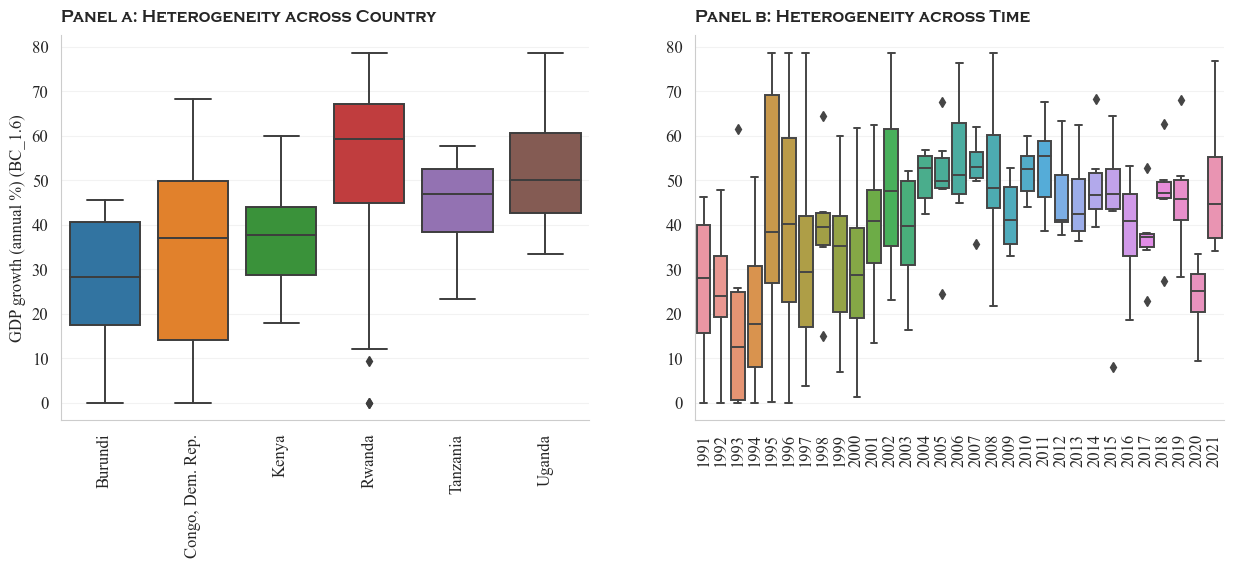

In [87]:
# Plot the heterogeneity of GDP growth (annual %) by country and year (change ratio to 2:3)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=clean_df, x='Country', y=yname, ax=ax[0])
sns.boxplot(data=clean_df, x='Year', y=yname, ax=ax[1])

ax[0].axes.xaxis.set_label_text('')
# Rotate xtick labels ax[0]
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].axes.xaxis.set_label_text('')
ax[1].axes.yaxis.set_label_text('')

# Set titles
ax[0].set_title('Panel a: Heterogeneity across Country', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[1].set_title('Panel b: Heterogeneity across Time', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)

# Remove spines
# ax[0].spines[['top', 'right']].set_visible(False)
# ax[1].spines[['top', 'right']].set_visible(False)

plt.show()

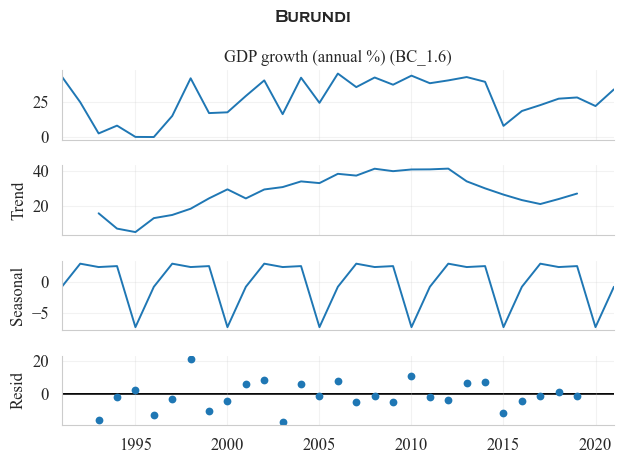

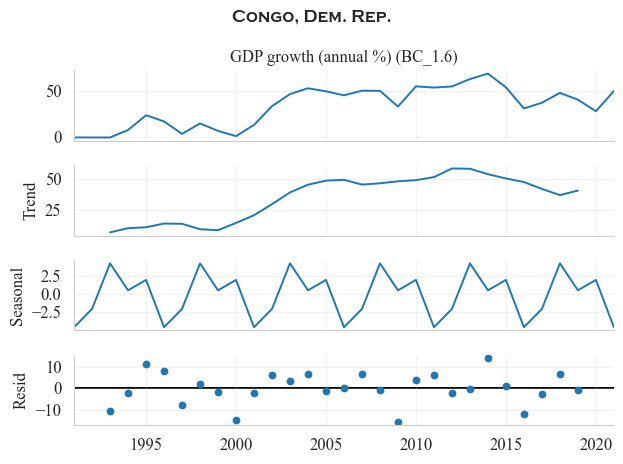

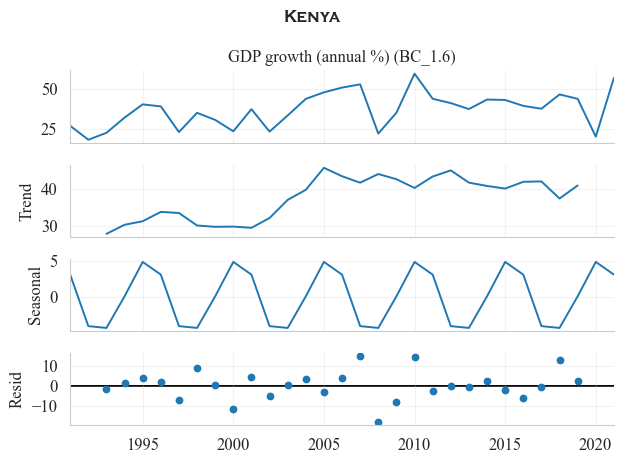

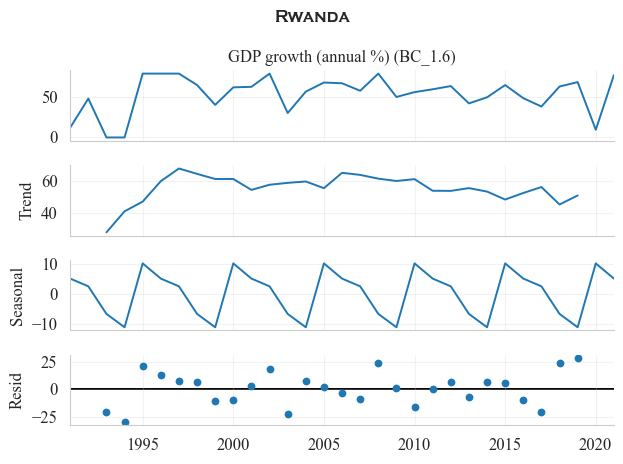

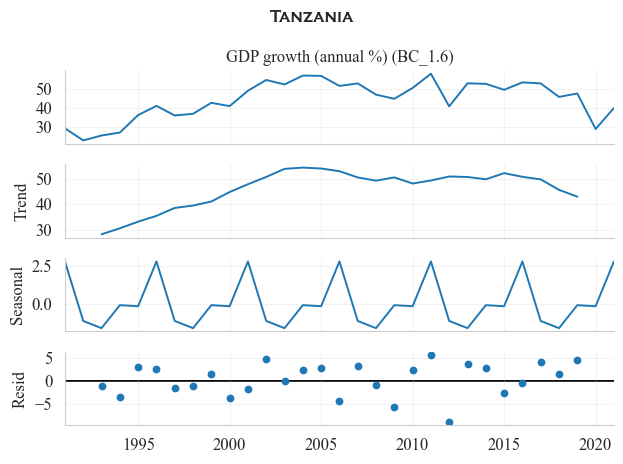

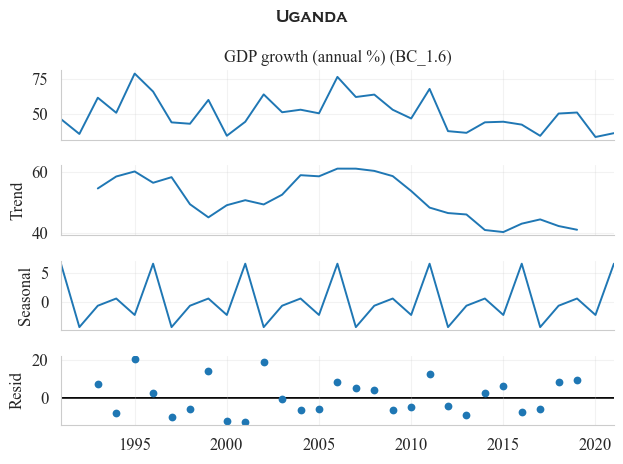

In [88]:
# Decompose the time series into trend, seasonal and residual components for each country
countries = clean_df['Country'].unique()

for country in countries:
    # Filter the data by country
    country_df = clean_df[clean_df['Country'] == country]
    
    # Change the dtype of 'Year' to datetime
    # country_df['Year'] = pd.to_datetime(country_df['Year'], format='%Y')
    
    # Set the index to 'Year'
    country_df.set_index('Year', inplace=True)
    
    # Decompose the time series
    decomposition = sm.tsa.seasonal_decompose(country_df[yname], period=5)
    
    # Plot the decomposition
    fig = decomposition.plot()
    fig.suptitle(country, fontfamily='Copperplate Gothic Bold', fontsize=12, y=1.05)
    plt.show()

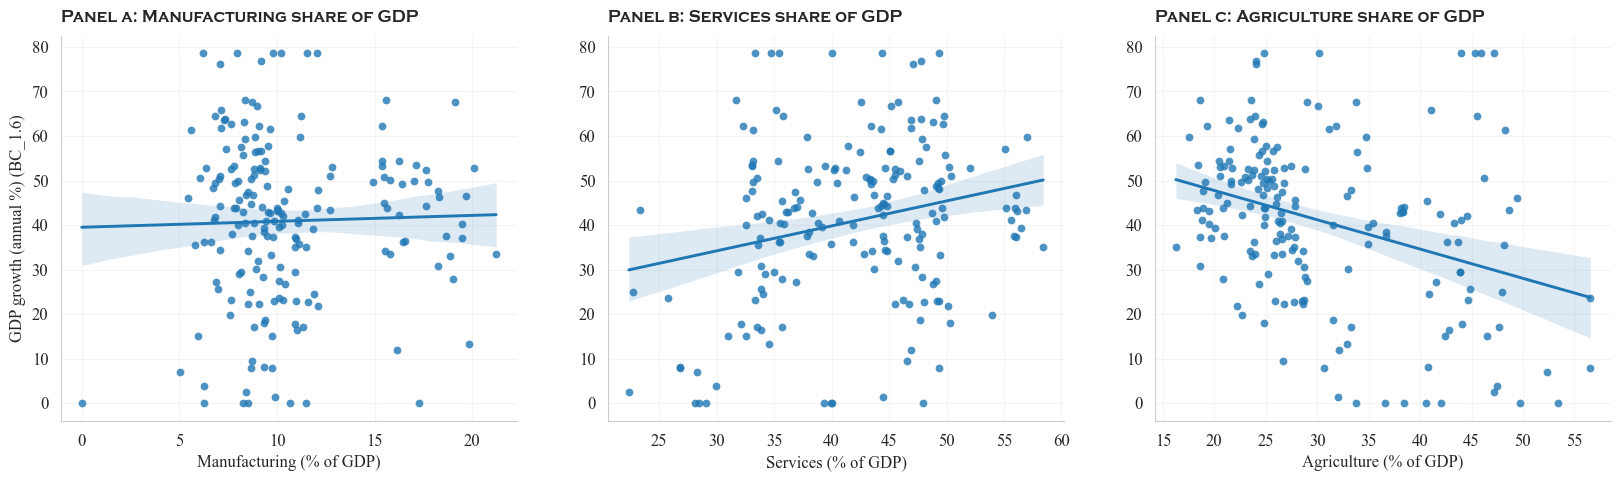

In [89]:
# Scatter sectoral contribution to GDP (one legend)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.regplot(data=clean_df, x='Manufacturing (% of GDP)', y=yname, ax=ax[0])
sns.regplot(data=clean_df, x='Services (% of GDP)', y=yname, ax=ax[1])
sns.regplot(data=clean_df, x='Agriculture (% of GDP)', y=yname, ax=ax[2])

ax[0].set_title('Panel a: Manufacturing share of GDP', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[1].set_title('Panel b: Services share of GDP', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[2].set_title('Panel c: Agriculture share of GDP', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)

# Remove y-axis label
ax[1].axes.yaxis.set_label_text('')
ax[2].axes.yaxis.set_label_text('')

# Reduce the opacity of the grid
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
ax[2].grid(alpha=0.2)

plt.show()
                

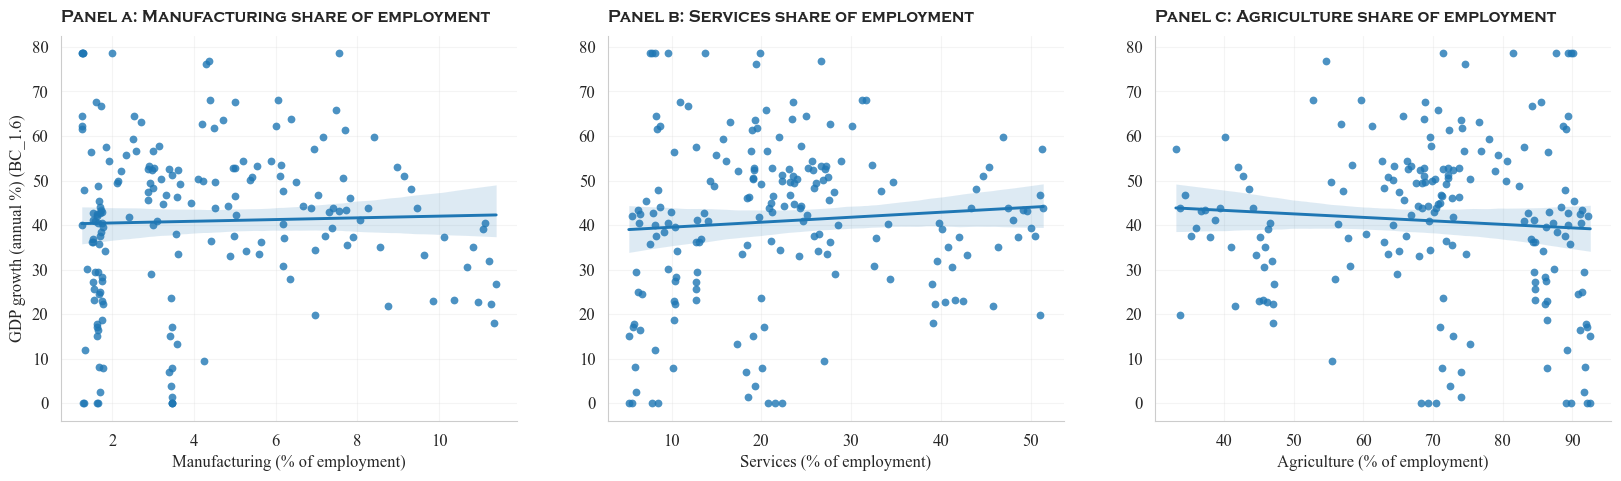

In [90]:
# Scatter sectoral contribution to employment (one legend)
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.regplot(data=clean_df, x='Manufacturing (% of employment)', y=yname, ax=ax[0])
sns.regplot(data=clean_df, x='Services (% of employment)', y=yname, ax=ax[1])
sns.regplot(data=clean_df, x='Agriculture (% of employment)', y=yname, ax=ax[2])

ax[0].set_title('Panel a: Manufacturing share of employment', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[1].set_title('Panel b: Services share of employment', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[2].set_title('Panel c: Agriculture share of employment', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)

# Remove y-axis label
ax[1].axes.yaxis.set_label_text('')
ax[2].axes.yaxis.set_label_text('')

# Reduce the opacity of the grid
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
ax[2].grid(alpha=0.2)

plt.show()


<Axes: xlabel='GDP growth (annual %) (BC_1.6)', ylabel='Density'>

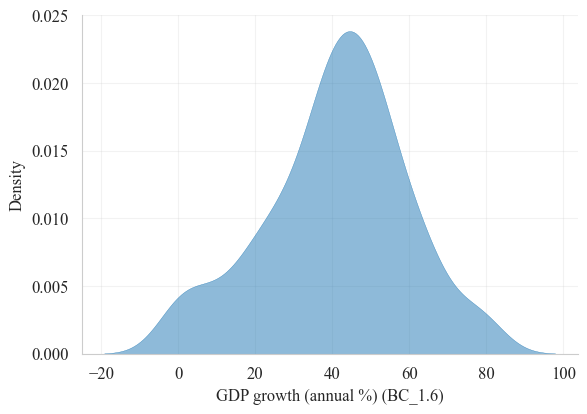

In [91]:
# Create the plot


sns.kdeplot(data=clean_df, x=yname, hue=None, fill=True, alpha=0.5)

# # Bottom subplot with conditioning plots
# g = sns.FacetGrid(df, col="Country", col_wrap=3, sharey=True)
# # Map a lowess plot to the FacetGrid
# g.map(sns.regplot, "Year", "GDP growth (annual %)", lowess=True, scatter_kws={'alpha': 0.5})
# g.set_axis_labels("Year", "GDP growth (annual %)")
# plt.show()

# sns.scatterplot(data=clean_df, x='Year', y='GDP growth (annual %)', hue='Country', ax=ax[1], legend=False)


## Empirical Analysis

---

In [92]:
# Prepare the data for the analysis
model_df = clean_df.copy()

# Drop 'Country', "Industry (% of GDP)", "Industry (% of employment)" columns
model_df.drop(columns=['Country'], inplace=True)

# List of column codes
col_codes = ["C", "T", "Y", "L", "K", "M", "EM", "S", "ES", "A", "EA", "TO", "FD", "PS"]

# Replace the column names with the column codes
model_df.columns = col_codes

# Set the index
model_df.set_index(['C', 'T'], inplace=True)

# Split the data into features and target
X = model_df.drop(columns=['Y', 'EM', 'ES', 'EA'])
X_robust = model_df.drop(columns=['Y', 'M', 'S', 'A'])
X = sm.add_constant(X)
X_robust = sm.add_constant(X_robust)

y = model_df['Y']

### 1. Pooled 
A pooled model assumes that the intercepts and slopes are constant across individuals (group and entity) or heterogeneity is constant across the same panel. This pooled model is estimated:

In [93]:
# # Create the model
# pooled_ols = PooledOLS(y, X, check_rank=True)
# 
# # Fit the model
# pooled_ols = pooled_ols.fit()
# 
# # Print the summary
# print(pooled_ols.summary)

This summary presents the results of a PooledOLS (Ordinary Least Squares) regression estimation. Here's an interpretation:

**Dependent Variable (Y)**
- The model is trying to explain or predict the behavior of a variable 'Y'.

**Observations and Entities**
- The model uses data from 186 observations.
- The data is taken from 6 different countries, with each country having 31 observations.
- The time periods span 31 years, with each year having an average of 6 observations.

**Model Fit Statistics**
- R-squared: This statistic, at 0.2142, implies that approximately 21.42% of the variability in the dependent variable 'Y' is explained by the independent variables in the model.
    - R-squared (Between): About 88.70% of the variability between the entities is explained by the model.
    - R-squared (Within): About 14.23% of the variability within each entity is explained by the model.
  
- F-statistic: The value of 6.0316 (with a p-value of 0.0000) suggests that the independent variables, as a group, are statistically significant predictors of the dependent variable 'Y'.

**Parameter Estimates (Coefficients)**
- `const` (Constant): The expected value of 'Y' when all other independent variables are zero is approximately 17.663. This value is marginally significant (p-value: 0.0721).
  
- `L`: A one-unit increase in 'L' is associated with a decrease of approximately 8.093e-08 in 'Y', though this is not statistically significant (p-value: 0.2963).
  
- `K`: A one-unit increase in 'K' corresponds to an increase of about 0.0878 in 'Y', but this is also not significant (p-value: 0.4146).
  
- `M`: A one-unit rise in 'M' leads to a decrease of about 0.1234 in 'Y'. This result isn't statistically significant (p-value: 0.3877).
  
- `S`: The coefficient for 'S' is 0.0111, indicating a very slight increase in 'Y' with a one-unit increase in 'S'. This relationship isn't significant (p-value: 0.9248).
  
- `A`: For a one-unit increase in 'A', 'Y' would decrease by approximately 0.2148. This relationship is statistically significant (p-value: 0.0403), making 'A' a noteworthy predictor.
  
- `TO`: The 'TO' variable's coefficient suggests a decrease of 0.0344 in 'Y' for a one-unit increase in 'TO', though this isn't statistically significant (p-value: 0.3193).
  
- `FD`: A significant predictor, a one-unit rise in 'FD' leads to a decrease of 0.1592 in 'Y' (p-value: 0.0041).
  
- `PS`: A one-unit increase in 'PS' results in an increase of 1.6631 in 'Y', but this isn't statistically significant (p-value: 0.1437).

**Overall**
- Among the variables, 'A' and 'FD' are the only ones that are statistically significant at conventional levels, suggesting they have the most robust associations with the dependent variable 'Y'.
- The other variables, despite their coefficients, do not significantly predict 'Y' in this model, as indicated by their respective p-values.

### 2. Fixed Effects
A fixed-effect model examines individual differences in intercepts, assuming the same slopes and constant variance across individuals (group and entity) or heterogeneity is fixed across the same panel. This fixed effect model is estimated:

In [94]:
# Create the model
fixed_effects = PanelOLS(y, X, entity_effects=False, time_effects=True, check_rank=True)

# Fit the model
fixed_effects = fixed_effects.fit(cov_type='robust')

# Print the summary
print(fixed_effects.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                      Y   R-squared:                        0.3020
Estimator:                   PanelOLS   R-squared (Between):              0.8723
No. Observations:                 186   R-squared (Within):               0.1537
Date:                Fri, Oct 27 2023   R-squared (Overall):              0.3350
Time:                        15:29:19   Log-likelihood                   -736.62
Cov. Estimator:                Robust                                           
                                        F-statistic:                      7.9515
Entities:                           6   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(8,147)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):             10.124
                            

This is a PanelOLS (Panel Ordinary Least Squares) regression estimation. The following is an interpretation of the summary:

**Dependent Variable (Y)**
- The dependent variable that the model aims to explain or predict is 'Y'.

**Observations and Entities**
- The model analyzes data from 186 observations.
- Data comes from 6 distinct countries, each providing 31 observations.
- The time dimension has 31 years, with an average of 6 observations per period.

**Model Fit Statistics**
- R-squared: The R-squared value of 0.0951 implies that roughly 9.51% of the variability in the dependent variable 'Y' can be explained by the model's predictors.
    - R-squared (Between): -1.6209 indicates that the model fits poorly when considering the differences between the entities.
    - R-squared (Within): About 15.61% of the variability within each entity can be attributed to the model's predictors.
    - R-squared (Overall): The overall fit is negative (-0.0155), which is unusual and suggests a poor model fit for the entire panel.
  
- F-statistic: The F-statistic value of 1.8651 (with a p-value of 0.0700) suggests the independent variables might be significant predictors of 'Y', but this significance is marginal (just above the usual 0.05 threshold).

**Parameter Estimates (Coefficients)**
- `const` (Constant): The expected value of 'Y' when all predictors are zero is approximately 18.376. This is not statistically significant (p-value: 0.2424).
  
- `L`: A one-unit increase in 'L' predicts an increase of 2.869e-07 in 'Y', though this association isn't statistically significant (p-value: 0.4433).
  
- `K`: A unit increase in 'K' corresponds to a 0.0744 increase in 'Y'. This predictor is not significant (p-value: 0.5859).
  
- `M`: A one-unit rise in 'M' predicts a decrease of 0.2350 in 'Y'. This predictor is marginally significant (p-value: 0.1174).
  
- `S`: 'S' predicts a decrease of 0.0705 in 'Y' for every unit increase, but this isn't significant (p-value: 0.6956).
  
- `A`: A one-unit rise in 'A' predicts a 0.1191 decrease in 'Y', but it's not statistically significant (p-value: 0.3776).
  
- `TO`: A unit increase in 'TO' suggests a decrease of 0.0316 in 'Y', which isn't statistically significant (p-value: 0.5798).
  
- `FD`: Significantly, a one-unit rise in 'FD' corresponds to a 0.2418 decrease in 'Y' (p-value: 0.0471).
  
- `PS`: A one-unit increase in 'PS' suggests an increase of 3.0627 in 'Y', which is marginally significant (p-value: 0.0615).

**Poolability Test**
- F-test for Poolability: Tests whether entity-specific and time-specific effects are jointly equal to zero. A value of 1.4576 with a p-value of 0.0651 suggests that there might be significant entity and time effects, but this is marginally significant.

**Effects**
- The model includes both entity and time effects, accounting for unobserved heterogeneity across entities and time periods.

**Overall**
- Among the predictors, only 'FD' is statistically significant at conventional levels (p<0.05).
- 'PS' and 'M' show marginal significance.
- The overall fit of the model isn't particularly strong, as indicated by the R-squared values, especially the negative "between" and "overall" R-squared values.

### 3. Random Effects
A random-effects model assumes that the intercepts are random variables, and the slopes are fixed. This random effect model is estimated:

In [95]:
# Create the model
random_effects = RandomEffects(y, X, check_rank=True)

# Fit the model
random_effects = random_effects.fit(cov_type='robust')

# Print the summary
print(random_effects.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                      Y   R-squared:                        0.3470
Estimator:              RandomEffects   R-squared (Between):              0.9041
No. Observations:                 186   R-squared (Within):               0.1590
Date:                Fri, Oct 27 2023   R-squared (Overall):              0.3470
Time:                        15:29:19   Log-likelihood                   -764.28
Cov. Estimator:                Robust                                           
                                        F-statistic:                      11.758
Entities:                           6   P-value                           0.0000
Avg Obs:                       31.000   Distribution:                   F(8,177)
Min Obs:                       31.000                                           
Max Obs:                       31.000   F-statistic (robust):             14.131
                            

This is a Random Effects regression estimation. The following is an interpretation of the summary:

**Dependent Variable (Y)**
- The dependent variable that the model aims to explain or predict is 'Y'.

**Observations and Entities**
- The model analyzes data from 186 observations.
- Data comes from 6 distinct entities (presumably countries given the note), each providing 31 observations.
- The time dimension has 31 periods, with an average of 6 observations per period.

**Model Fit Statistics**
- R-squared: The R-squared value of 0.2142 implies that about 21.42% of the variability in the dependent variable 'Y' can be explained by the model's predictors.
    - R-squared (Between): A high value of 0.8870 suggests that the model fits well when considering the differences between the entities (countries).
    - R-squared (Within): About 14.23% of the variability within each entity can be attributed to the model's predictors.
    - R-squared (Overall): The model accounts for 21.42% of the variance in 'Y' across all observations.

- F-statistic: The F-statistic value of 6.0316 (with a p-value of 0.0000) strongly suggests the independent variables are significant predictors of 'Y'.

**Parameter Estimates (Coefficients)**
- `const` (Constant): The expected value of 'Y' when all predictors are zero is approximately 17.663. This is marginally significant (p-value: 0.0721).
  
- `L`: A one-unit increase in 'L' predicts a decrease of 8.093e-08 in 'Y'. This association isn't statistically significant (p-value: 0.2963).
  
- `K`: A unit increase in 'K' leads to an increase of 0.0878 in 'Y'. This predictor isn't statistically significant (p-value: 0.4146).
  
- `M`: An increase in 'M' by one unit predicts a decrease of 0.1234 in 'Y'. This is not statistically significant (p-value: 0.3877).
  
- `S`: A unit increase in 'S' corresponds to a tiny increase of 0.0111 in 'Y', which is not significant (p-value: 0.9248).
  
- `A`: A one-unit increase in 'A' predicts a decrease of 0.2148 in 'Y'. This predictor is statistically significant (p-value: 0.0403).
  
- `TO`: A unit increase in 'TO' corresponds to a decrease of 0.0344 in 'Y'. This isn't statistically significant (p-value: 0.3193).
  
- `FD`: Significantly, a one-unit rise in 'FD' leads to a decrease of 0.1592 in 'Y' (p-value: 0.0041).
  
- `PS`: A unit increase in 'PS' leads to an increase of 1.6631 in 'Y'. This predictor is not statistically significant (p-value: 0.1437).

**Overall**
- Among the predictors, 'A' and 'FD' are statistically significant at conventional levels (p<0.05).
- The overall fit of the model is moderate, with a total R-squared of 21.42%.
- Given the note, it's clear that this model controls for country-specific and time-specific effects, thus capturing unobserved heterogeneity across countries and time periods.

### 4. Hausman Test

The Hausman test is used to determine whether the random effects model is appropriate or whether the fixed effects model should be used. The null hypothesis is that the preferred model is random effects. The alternative hypothesis is that the preferred model is fixed effects. The test statistic is distributed as chi-squared with degrees of freedom equal to the difference in the number of coefficients between the two models being compared. The test statistic is computed as:

In [96]:
# Calculate the Hausman test
b = fixed_effects.params
B = random_effects.params

# Difference in coefficients (excluding the constant)
diff = b - B

# Covariance of the coefficients
V_b = fixed_effects.cov
V_B = random_effects.cov

# Difference in covariance
V_diff = V_b - V_B

# Calculate the standard errors of the difference in covariances
se_diff = np.sqrt(np.diag(V_diff))

# Calculate the p-value
dfreedom = len(diff)# Number of predictors

# Calculate the test statistic
hausman_stat = np.dot(diff.T, np.dot(np.linalg.inv(V_diff), diff))

# Calculate the p-value
p_val = stats.chi2.sf(hausman_stat, df=dfreedom)

# Create table
table = pd.DataFrame({'Fixed Effects (b)': b,
                      'Random Effects (B)': B,
                      'Difference (b-B)': diff,
                      'Std. Error (sqrt(diag(V_b-V_B)))': se_diff
                        })
display(table.round(4))
print('b = consistent under Ho and Ha; obtained from PanelOLS')
print('B = inconsistent under Ha, efficient under Ho; obtained from RandomEffects')
print('Test Ho: difference in coefficients not systematic')
print(f'chi2({dfreedom}) = {hausman_stat:.4f}')
print(f'Prob > chi2 = {p_val:.4f}')

print('\nConclusion')
print('----------')
if p_val < 0.05:
    print('Reject Ho: difference in coefficients is systematic.\nUse random effects model.')
else:
    print('Fail to reject Ho: difference in coefficients is not systematic.\nUse fixed effects model.')
    
# Save the table
table.round(2).to_csv('../results/hausman.tsv', sep='\t', index=True, header=True)

C:\Users\kisee\AppData\Local\Temp\ipykernel_22144\1124333481.py:16: RuntimeWarning: invalid value encountered in sqrt
  se_diff = np.sqrt(np.diag(V_diff))


,Fixed Effects (b),Random Effects (B),Difference (b-B),Std. Error (sqrt(diag(V_b-V_B)))
const,66.6314,79.1994,-12.5680,16.5896
L,-0.0264,-0.0291,0.0027,0.0039
K,0.5463,0.4329,0.1134,0.1538
M,-0.2574,-0.2670,0.0096,NaN
S,0.1867,0.1873,-0.0007,0.1623
A,-0.3409,-0.5767,0.2358,0.2056
TO,0.1052,0.1358,-0.0306,0.0801
FD,-0.5966,-0.6780,0.0815,0.0552
PS,4.7388,5.5628,-0.8240,0.3882


b = consistent under Ho and Ha; obtained from PanelOLS
B = inconsistent under Ha, efficient under Ho; obtained from RandomEffects
Test Ho: difference in coefficients not systematic
chi2(9) = -56.5207
Prob > chi2 = 1.0000

Conclusion
----------
Fail to reject Ho: difference in coefficients is not systematic.
Use fixed effects model.


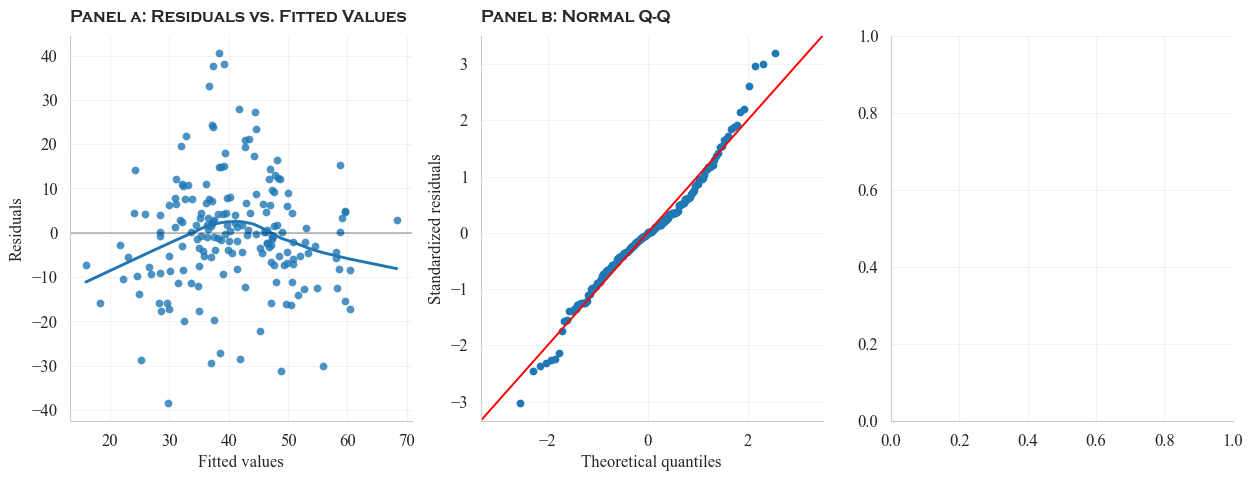

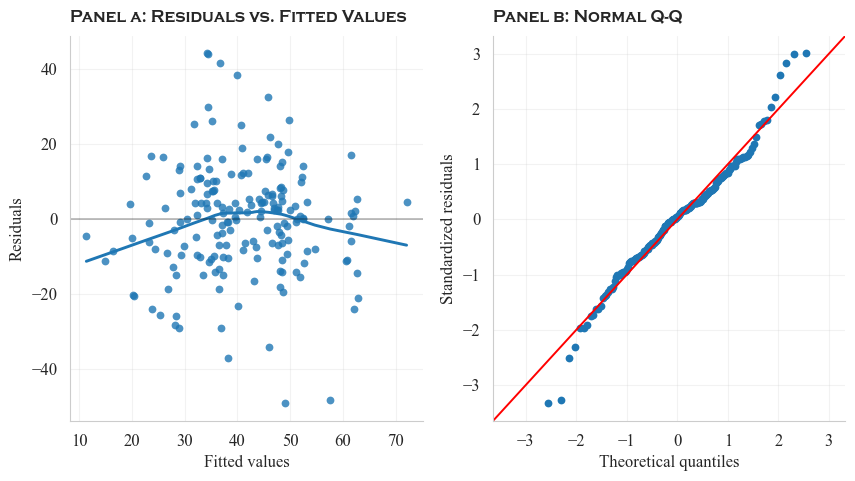

                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                        Y                 Y
Estimator                     PanelOLS     RandomEffects
No. Observations                   186               186
Cov. Est.                       Robust            Robust
R-squared                       0.3020            0.3470
R-Squared (Within)              0.1537            0.1590
R-Squared (Between)             0.8723            0.9041
R-Squared (Overall)             0.3350            0.3470
F-statistic                     7.9515            11.758
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                         66.631**         79.199***
                              (32.258)          (27.666)
L                            -0.0264**        -0.0291***
                              (

In [97]:
# Heteroskedasticity
# Plot the residuals vs. fitted values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Residuals vs. Fitted values
sns.regplot(x=fixed_effects.fitted_values, y=fixed_effects.resids, ci=None, lowess=True, ax=ax[0])
ax[0].set_title('Panel a: Residuals vs. Fitted Values', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[0].axes.xaxis.set_label_text('Fitted values')
ax[0].axes.yaxis.set_label_text('Residuals')
ax[0].axhline(y=0, color='black', alpha=0.25)

# QQ plot (use standardized residuals)
sm.qqplot(fixed_effects.resids, line='45', fit=True, ax=ax[1])
ax[1].set_title('Panel b: Normal Q-Q', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[1].axes.xaxis.set_label_text('Theoretical quantiles')
ax[1].axes.yaxis.set_label_text('Standardized residuals')

# Scale location
sns.regplot(x=fixed_effects.fitted_values, y=np.sqrt(np.abs(fixed_effects.resids)), ci=None, lowess=True, ax=ax[2])
ax[2].set_title('Panel c: Scale-Location', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[2].axes.xaxis.set_label_text('Fitted values')
ax[2].axes.yaxis.set_label_text('sqrt(|Standardized residuals|)')

plt.show()

# RE
# Plot the residuals vs. fitted values
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Residuals vs. Fitted values
sns.regplot(x=random_effects.fitted_values, y=random_effects.resids, ci=None, lowess=True, ax=ax[0])
ax[0].set_title('Panel a: Residuals vs. Fitted Values', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[0].axes.xaxis.set_label_text('Fitted values')
ax[0].axes.yaxis.set_label_text('Residuals')
ax[0].axhline(y=0, color='black', alpha=0.25)

# sns.scatterplot(x=random_effects.fitted_values, y=random_effects.resids, ax=ax[0])
# ax[0].set_title('Panel a: Residuals vs. Fitted Values', fontfamily='Copperplate Gothic Bold',
#                 loc='left', pad=10)
# ax[0].axes.xaxis.set_label_text('Fitted values')
# ax[0].axes.yaxis.set_label_text('Residuals')
# ax[0].axhline(y=0, color='black', alpha=0.5)

# QQ plot (use standardized residuals)
sm.qqplot(random_effects.resids, line='45', fit=True, ax=ax[1])
ax[1].set_title('Panel b: Normal Q-Q', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[1].axes.xaxis.set_label_text('Theoretical quantiles')
ax[1].axes.yaxis.set_label_text('Standardized residuals')

# Scale location
sns.regplot(x=random_effects.fitted_values, y=np.sqrt(np.abs(random_effects.resids)), ci=None, lowess=True, ax=ax[2])
ax[2].set_title('Panel c: Scale-Location', fontfamily='Copperplate Gothic Bold',
                loc='left', pad=10)
ax[2].axes.xaxis.set_label_text('Fitted values')
ax[2].axes.yaxis.set_label_text('sqrt(|Standardized residuals|)')
plt.show()

# Leverage
# Plot the leverage
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# 
# # Residuals vs. Leverage
# sns.regplot(x=fixed_effects.get_influence().hat_matrix_diag, y=fixed_effects.resids, ci=None, lowess=True, ax=ax[0])
# ax[0].set_title('Panel a: Residuals vs. Leverage', fontfamily='Copperplate Gothic Bold',
#                 loc='left', pad=10)
# ax[0].axes.xaxis.set_label_text('Leverage')

# Compare the results using 'compare' from linearmodels
print(compare({'Fixed Effects': fixed_effects, 'Random Effects': random_effects},
              precision='std_errors', stars=True))


### 5. Breusch-Pagan Test
The Breusch-Pagan test is used to determine whether the variance of the errors from a regression is dependent on the values of the independent variables. The null hypothesis is that the variance is constant. The alternative hypothesis is that the variance is dependent on the values of the independent variables. The test statistic is distributed as chi-squared with degrees of freedom equal to the number of independent variables. The test statistic is computed as:

In [98]:
# Calculate the Breusch-Pagan test
bp_test = het_breuschpagan(fixed_effects.resids, X, robust=True)


# Print the results
print('Breusch-Pagan Test')
print('------------------')
print(f'Lagrange multiplier statistic: {bp_test[0]:.4f}')
print(f'p-value: {bp_test[1]:.4f}')
print(f'f-value: {bp_test[2]:.4f}')
print(f'f p-value: {bp_test[3]:.4f}')

print('\nConclusion')
print('----------')
if bp_test[1] < 0.05:
    print('Reject Ho: variance is not constant.\nUse robust standard errors.')
else:
    print('Fail to reject Ho: variance is constant.\nUse standard errors.')


Breusch-Pagan Test
------------------
Lagrange multiplier statistic: 34.8214
p-value: 0.0000
f-value: 5.0961
f p-value: 0.0000

Conclusion
----------
Reject Ho: variance is not constant.
Use robust standard errors.


In [99]:
# Multicollinearity
# Calculate the variance inflation factor (VIF)
vif = pd.DataFrame()

vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

# Print the results
display(vif.round(2))

,VIF Factor,features
0,546.43,const
1,2.17,L
2,4.17,K
3,1.64,M
4,4.47,S
5,4.96,A
6,1.49,TO
7,1.57,FD
8,4.18,PS


In [107]:
## Robustness Check
# Fit random effects to X_robust and y
robust_effects = PanelOLS(y, X_robust, entity_effects=False, time_effects=True, check_rank=True)

# Fit the model
robust_effects = robust_effects.fit(cov_type='robust')

robust_effects_ = RandomEffects(y, X_robust, check_rank=True)

# Fit the model
robust_effects_ = robust_effects_.fit(cov_type='robust')

# Compare
print(compare({'Fixed Effects': robust_effects, 'Random Effects': robust_effects_},
              precision='std_errors', stars=True)) 
# Print the summary


# Compare the results using 'compare' from linearmode

                    Model Comparison                    
                         Fixed Effects    Random Effects
--------------------------------------------------------
Dep. Variable                        Y                 Y
Estimator                     PanelOLS     RandomEffects
No. Observations                   186               186
Cov. Est.                       Robust            Robust
R-squared                       0.3923            0.3764
R-Squared (Within)              0.1334            0.1869
R-Squared (Between)             0.9655            0.9378
R-Squared (Overall)             0.3433            0.3764
F-statistic                     11.863            13.352
P-value (F-stat)                0.0000            0.0000
=====================     ============   ===============
const                       -229.55***         -245.38**
                              (86.867)          (103.69)
L                           -0.0559***        -0.0539***
                              (